In [1]:
# Lets load some libraries and car data and precalculated features
library(dplyr)
library(ggplot2)
library(glmnet)
library(corrplot)

load("data/trafi.RData"); 
kori.class <- class

Warning message:
“package ‘dplyr’ was built under R version 3.3.2”
Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Warning message:
“package ‘ggplot2’ was built under R version 3.3.2”Warning message:
“package ‘glmnet’ was built under R version 3.3.2”Loading required package: Matrix
Loading required package: foreach
Warning message:
“package ‘foreach’ was built under R version 3.3.2”Loaded glmnet 2.0-5



In [5]:
# Let's see 
select(autodata,ryhma,merkki,malli,mallimerkinta,kori.orig,kayttoonottoVuosi) %>% 
head(20)

ryhma,merkki,malli,mallimerkinta,kori.orig,kori.est,kayttoonottoVuosi
Henkilö,VOLKSWAGEN,PASSAT,5D PASSAT VARIANT 1.8 CL-351-C/263,Farmari,Farmari,1997
Henkilö,FORD,FIESTA,2D FIESTA 1.1-FBD/2280,NA,Viistoperä,1984
Henkilö,CITROEN,BX,4D SEDAN BX 19 GTI-XBEY/2650,NA,Sedan,1990
Henkilö,RENAULT,CLIO,2D CLIO HATCHBACK 1.2-CB0FCF/247,Viistoperä,Viistoperä,2003
Henkilö,HONDA,ACCORD,4D ACCORD SEDAN 2.0-CL75/268,Sedan,Sedan,2003
Henkilö,TOYOTA,COROLLA,5D COROLLA STW 1.6-ZZE121L-DWMNKW/260,Farmari,Farmari,2006
Henkilö,TOYOTA,RAV4,5D RAV4 MPV 2.2 D-4D-ALA30L-AWFGYW-4X4/256,Monikäyttö,Monikäyttö,2007
Henkilö,NISSAN,PRIMERA,4D PRIMERA 1.6I FANTASY-BAAP10/255,NA,Sedan,1996
Henkilö,HONDA,ACCORD,5D ACCORD TOURER 2.0-CM17/272,Monikäyttö,Monikäyttö,2003
Henkilö,NISSAN,ALMERA,4D ALMERA 1.6 HATCHBACK-FCAN15/254,Viistoperä,Viistoperä,2000


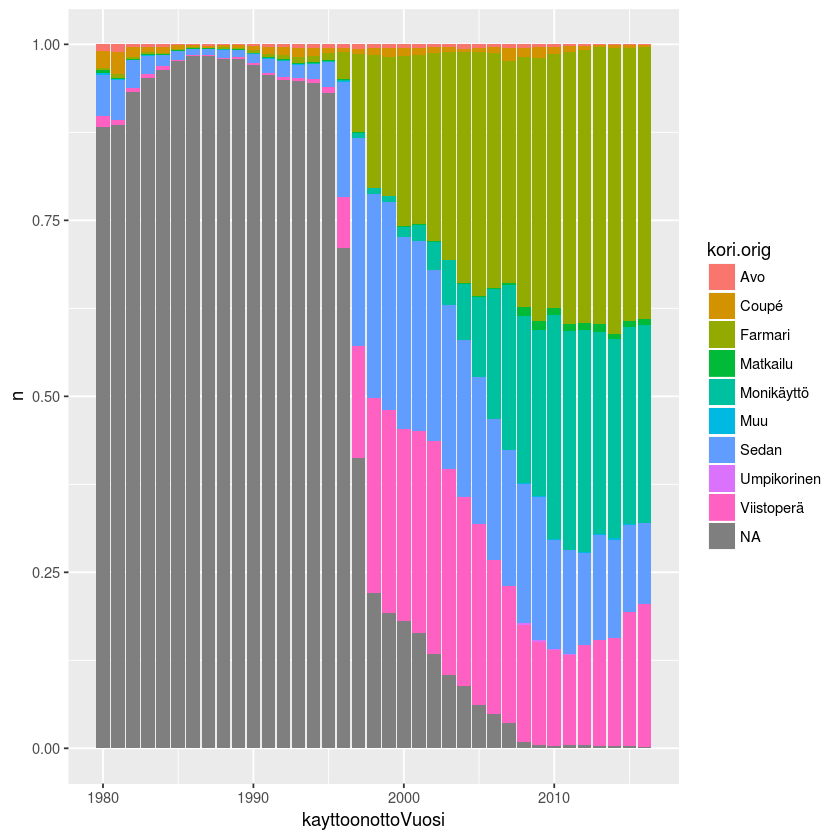

In [9]:
# Let's see the car type; there's plenty of missing data

filter(autodata,kayttoonottoVuosi>1979) %>% 
count(.,kori.orig,kayttoonottoVuosi) %>% 
ggplot(.,aes(x=kayttoonottoVuosi,y=n,fill=kori.orig))+geom_bar(stat="identity")

# change the ... +geom_bar(stat="identity") into +geom_bar(stat="identity",position="fill") 
# swithch kori.orig into kori (that contains a ready made prediction for missing)

# Observations?

In [ ]:

# Let's demonstrate LASSO regulatized regression, cross-validation, and 

# X contains a sparse matrix where data "merkki+mallimerkinta" is divided by space and some punctuation 
# 5D PASSAT VARIANT 1.8 CL-351-C/263 => [5D, PASSAT, VARIANT, 1.8, CL, 351, C/263]
# and one-hot-coded into a sparse matrix X and class vector c
#
# This has been done elsewhere, and rows with missing class kori.orig are omitted

head(X)
head(class)

# lets make it a bit smaller, and take a 5% sample
sample.idx<-seq(1, dim(X)[1], 20)
select.vars<-colSums(X)>10

dim(X)
dim(X[sample.idx,select.vars])

In [ ]:
# Multinomial classification, ten folds, LASSO 

classifier <-cv.glmnet(X[sample.idx, select.vars],
             as.factor(kori.class[sample.idx]),
             type.measure="deviance",
             family="multinomial",
             alpha=1,
             nfolds=10)


In [ ]:
# Lets see some statistics (deviation is not =classification error)
plot(classifier)

In [ ]:
#Lets predict using the best model and see the accuracy!

mean(kori.class == predict(classifier, X[,select.vars], type="class"))*100

In [ ]:
# Let's see the confusion matrix!
# kori.orig (true car type) is capitalized
options(scipen=999)

table(toupper(class), predict(lasso.model,X[,select.vars], type="class")) %>% 
  prop.table(.,1) 


In [ ]:
# Lets see the coefficients 

coef(lasso.model)$Sedan

In [ ]:
# Let's see this a bit better

cf<-coef(lasso.model)$Farmari
data.frame(attr=rownames(cf), coef=as.numeric(cf)) %>% 
arrange(-coef)

In [6]:
# For reference, there is a ready made 
# autodata contains a field kori.orig that is the original car type and 
# kori.est that has a prediction on the car type (sedan, wagon, ...)
# It's made also using the brand and model information string, and a tree gradient boosted tree classifier (XGboost). 

# Prediction accuracy (percentage)
mean(autodata$kori.est == autodata$kori.orig,na.rm=TRUE)*100

[1] 99.76438